c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.6110297801233592
MAE: 0.4560751417366699
MAPE: 0.12085117737293574
R2: 0.7774257320329464
      Actual  Predicted
3151    7.40   7.185281
3152    5.06   4.646863
3153    3.22   3.151883
3154    3.63   3.601524
3155    7.04   6.932269
...      ...        ...
3589    3.81   3.730877
3590    5.72   5.865708
3591    5.81   5.182466
3592    9.00   6.994021
3593    4.84   4.810524

[443 rows x 2 columns]
                   Feature  Importance
4              slg_percent    0.527305
5          on_base_percent    0.151063
8                   p_loss    0.014033
7                    p_win    0.011911
3               bb_percent    0.011001
9          p_quality_start    0.010412
16           whiff_percent    0.009378
10                  p_hold    0.008874
19        f_strike_percent    0.008725
24          ff_avg_break_x    0.008657
15            edge_percent    0.008518
20        flyballs_percent    0.008481
18             batted_ball    0.008270
35          cu_avg_break_x    0.008183
32   

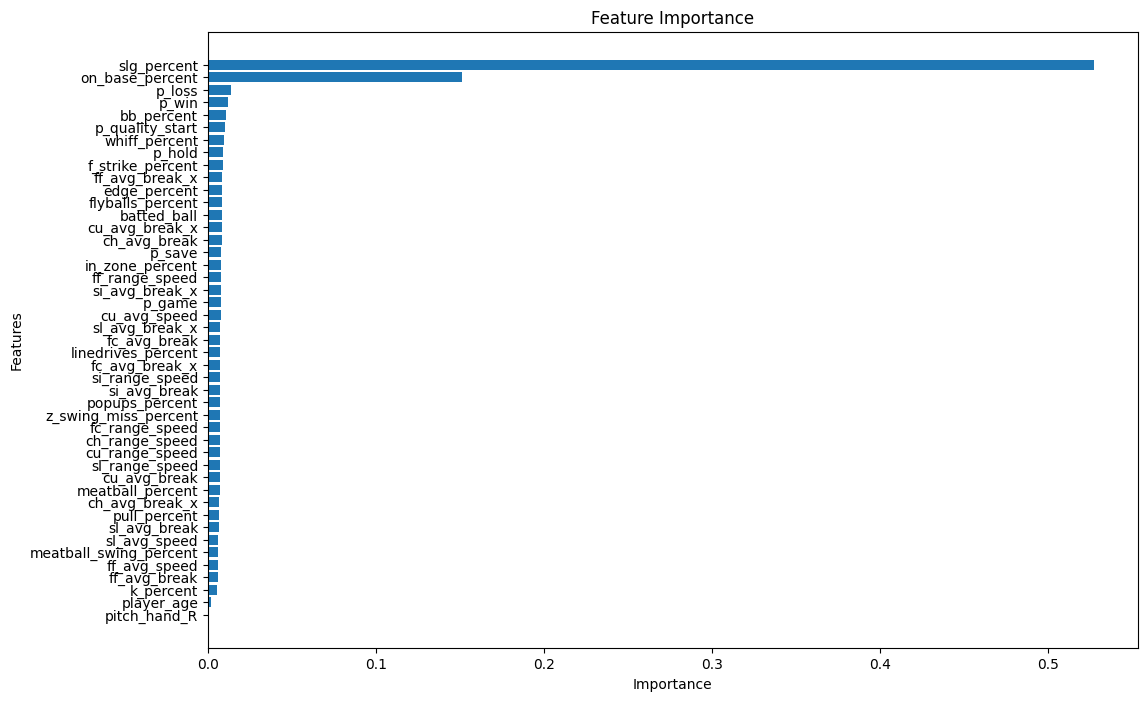

In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 데이터셋 불러오기
file_path = 'C:\\Users\\co279\\mp_statcast.csv'
data = pd.read_csv(file_path)

# 필요 없는 컬럼 제거
data = data.drop(columns=['last_name, first_name', 'player_id'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(0)

if 'pitch_hand' in data:
    data = pd.get_dummies(data, columns=['pitch_hand'], drop_first=True)

# 모든 데이터가 숫자형인지 확인하고, 필요 시 변환
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

# 학습 데이터와 테스트 데이터 분리
train_data = data[data['year'] != 2023]
test_data = data[data['year'] == 2023]

# 독립변수와 종속변수 분리
X_train = train_data.drop(columns=['p_era', 'year'])
y_train = train_data['p_era']
X_test = test_data.drop(columns=['p_era', 'year'])
y_test = test_data['p_era']

# 모델 정의
model = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)

# 모델 학습
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# 예측
y_pred = model.predict(X_test)

# RMSE 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

# R2 계산
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

# 실제 값과 예측 값 비교
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# 비교 결과 출력
print(comparison)

feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()